# How to make visual changes to the graphs?

## Changing the colour palette

By default, the colours of the nodes in `cegpy` are selected uniformly at random from the entire spectrum of colours. If we want to use a specific colour palette, a list of colours to be used by the AHC algorithm can be specified as a parameter when calling the `create_AHC_transitions` method, for example:

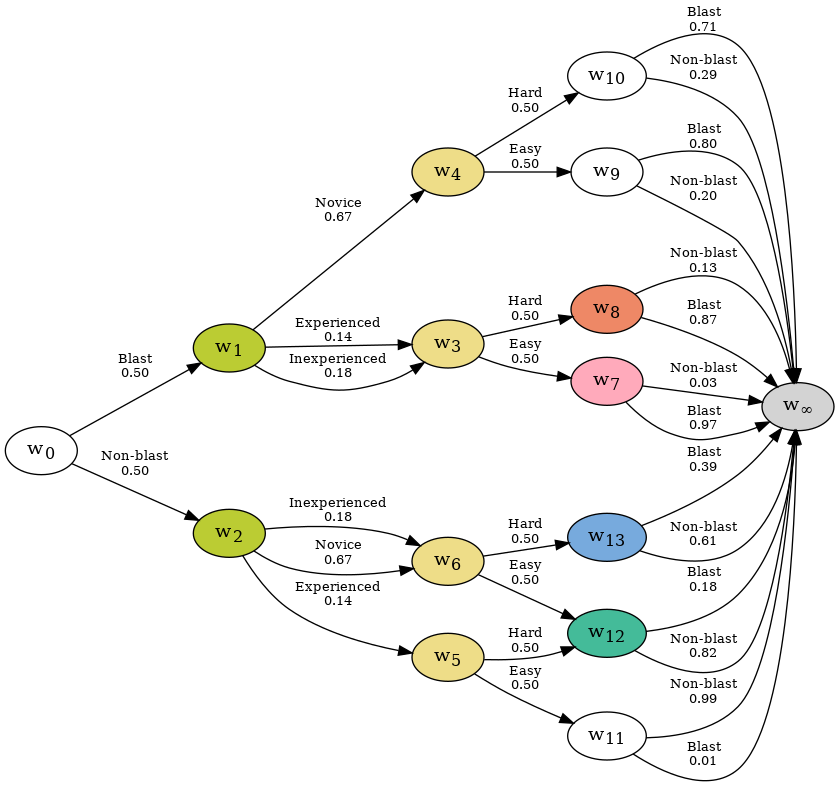

In [3]:
from cegpy import StagedTree, ChainEventGraph
import pandas as pd

df = pd.read_excel('../../data/medical_dm_modified.xlsx')

st = StagedTree(df)
colours = ['#BBCC33','#77AADD','#EE8866','#EEDD88','#FFAABB','#44BB99']
st.calculate_AHC_transitions(colour_list=colours)
ceg = ChainEventGraph(st)
ceg.create_figure()

## Modifying graph, node, and edge attributes

The graphs in `cegpy` are built with `GraphViz` and `PyDotPlus`. We can access the underlying `pydotplus.graphviz.Dot` object by accessing the `dot_graph property`. This enables visual modifications of our event tree, staged tree, or CEG. For example, the following code modifies the distance between the nodes, changes the style of each edge labelled `"Hard"` from solid to dashed, and changes the shape of the root node from oval to square.

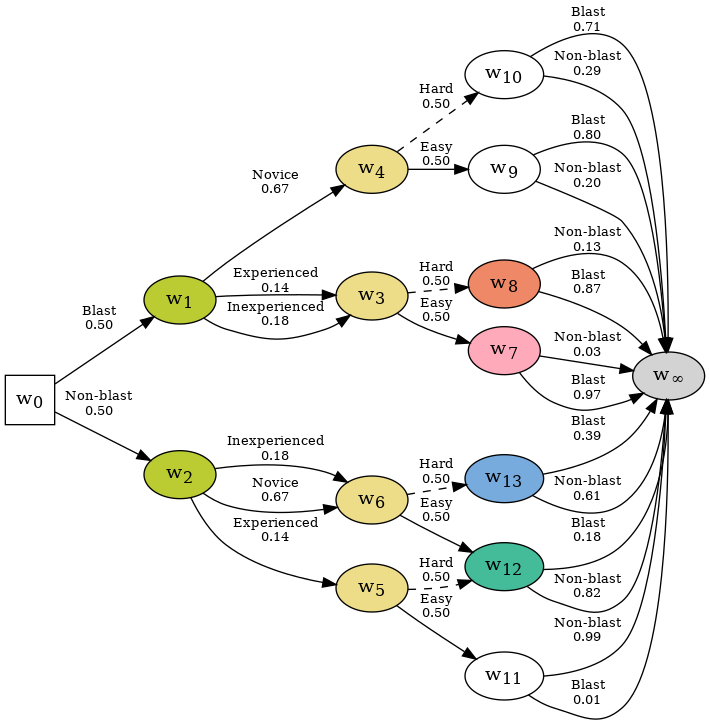

In [11]:
from IPython.display import Image

g = ceg.dot_graph()
g.set('ranksep', 0.1)
g.set('nodesep', 0.2)

for edge in g.get_edge_list():
    if "Hard" in edge.get("label"):
        edge.set_style('dashed')

g.get_node('w0')[-1].set_shape('square')

Image(g.create_png())

For more information about the available graph, node, and edge attributes refer to the [GraphViz](https://graphviz.org) and [PyDotPlus](https://pydotplus.readthedocs.io) documentation.